In [1]:
# 1-qadam.Analitik yondashuv .Modelni baholash

In [2]:
# 2-qadam.Ma'lumotlarni o'rganish.Df bilan ishlash

In [3]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
URL="https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df=pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Ma'lumotlarni o'rganish grafiklar

In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df_num=df.drop('ocean_proximity',axis=1)

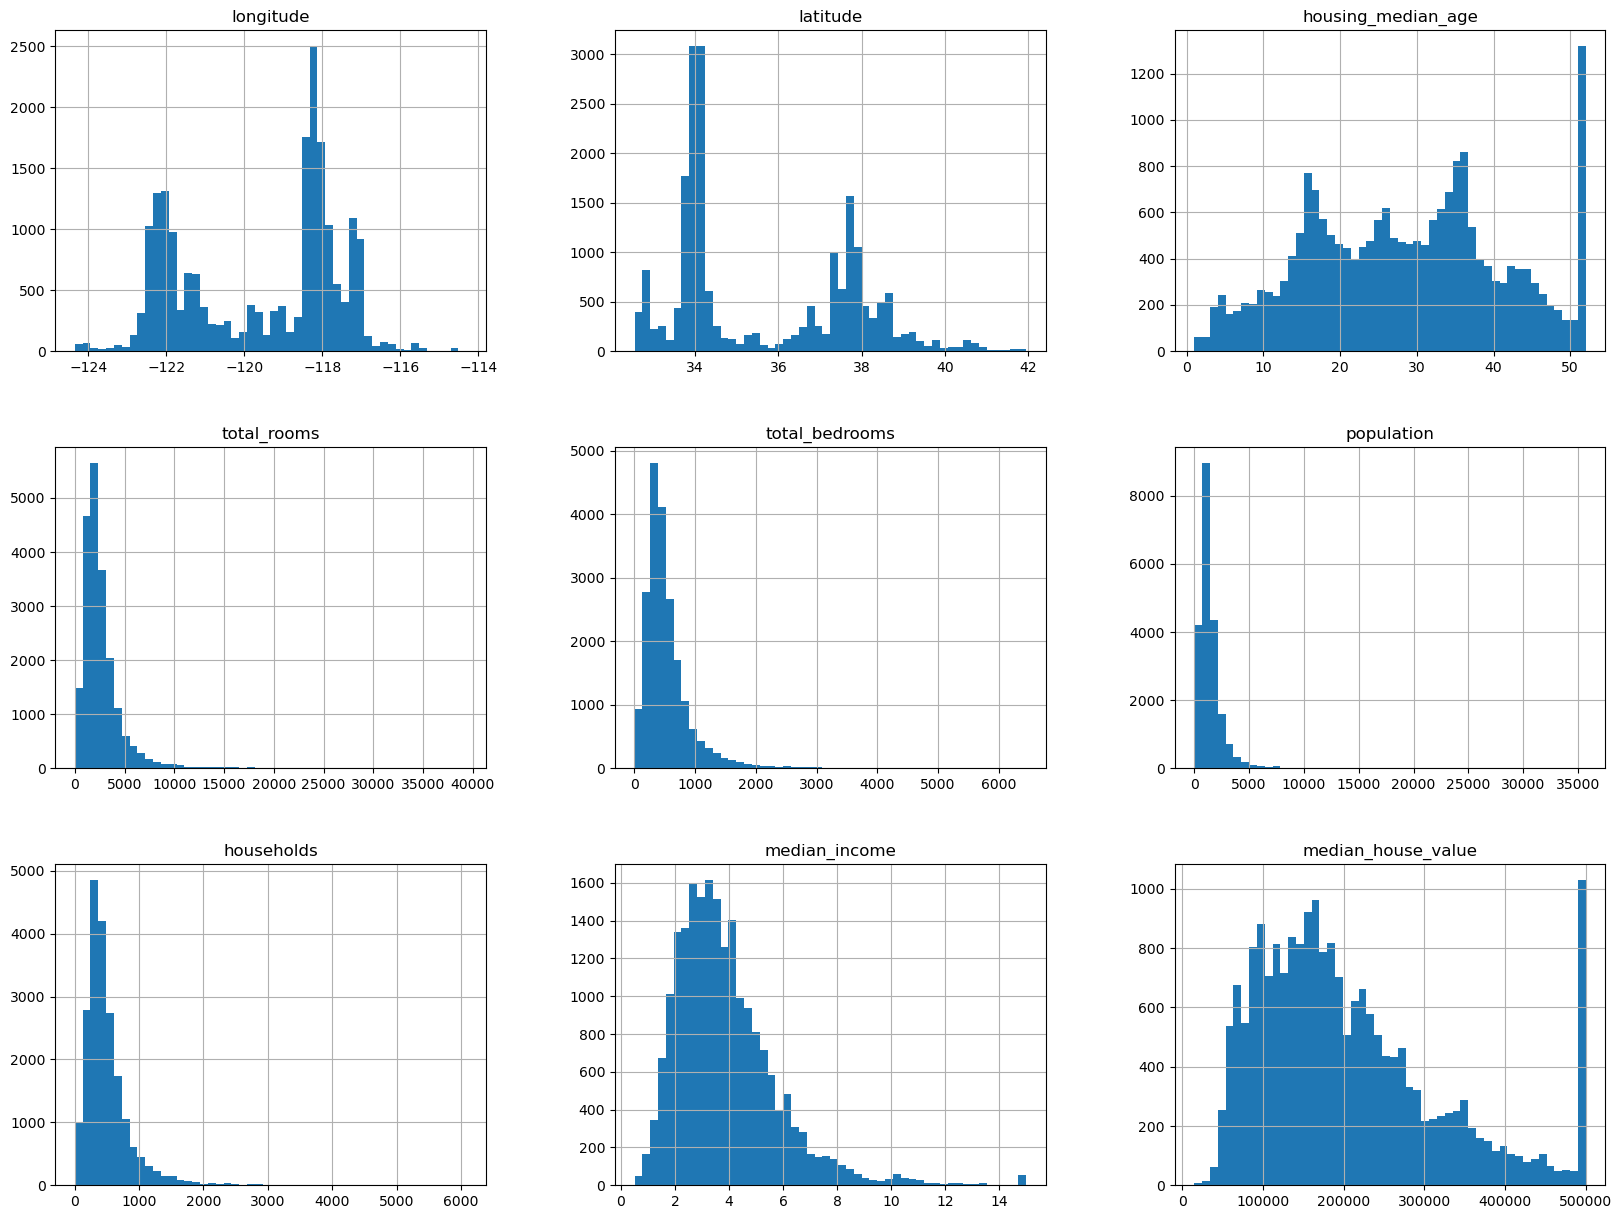

In [11]:
df_num.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
# train vatest set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [15]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [17]:
# muvozanatli train/test set
from sklearn.model_selection import StratifiedShuffleSplit

df['income_cat']=pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

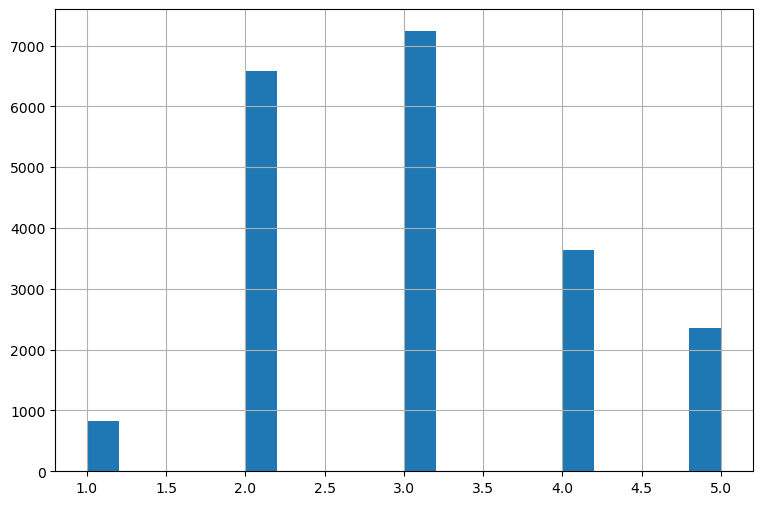

In [18]:
df.income_cat.hist(bins=20,figsize=(9,6))
plt.show()

In [19]:
stratified_split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

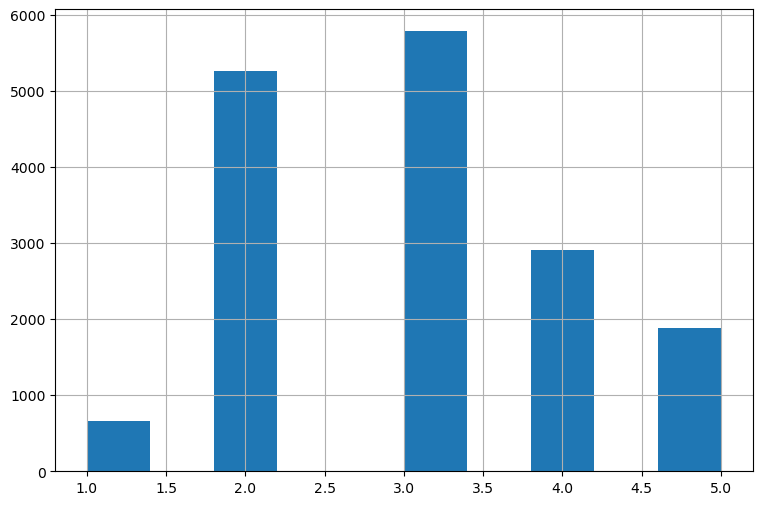

In [20]:
for train_index,test_index in stratified_split.split(df,df['income_cat']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

strat_train_set['income_cat'].hist(figsize=(9,6))
plt.show()

In [21]:
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [22]:
strat_train_set.drop('income_cat',axis=1,inplace=True)

In [23]:
# korrelatsiya

In [24]:
housing=strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


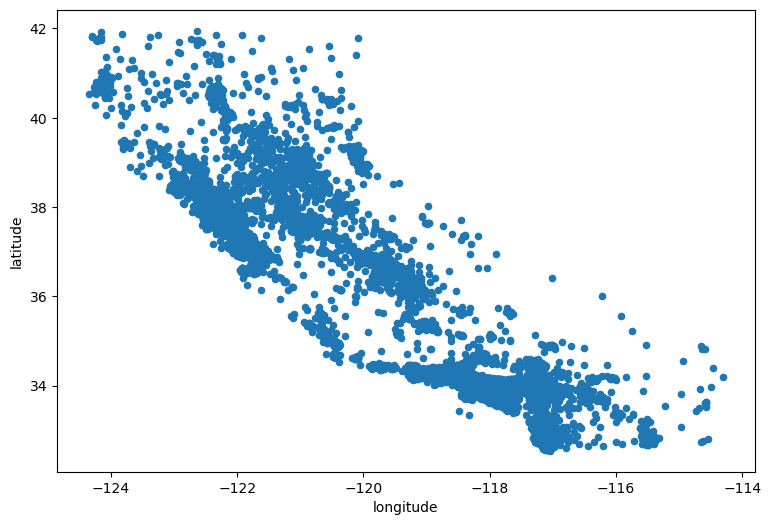

In [25]:
housing.plot(kind='scatter',x='longitude',y='latitude',figsize=(9,6))
plt.show()

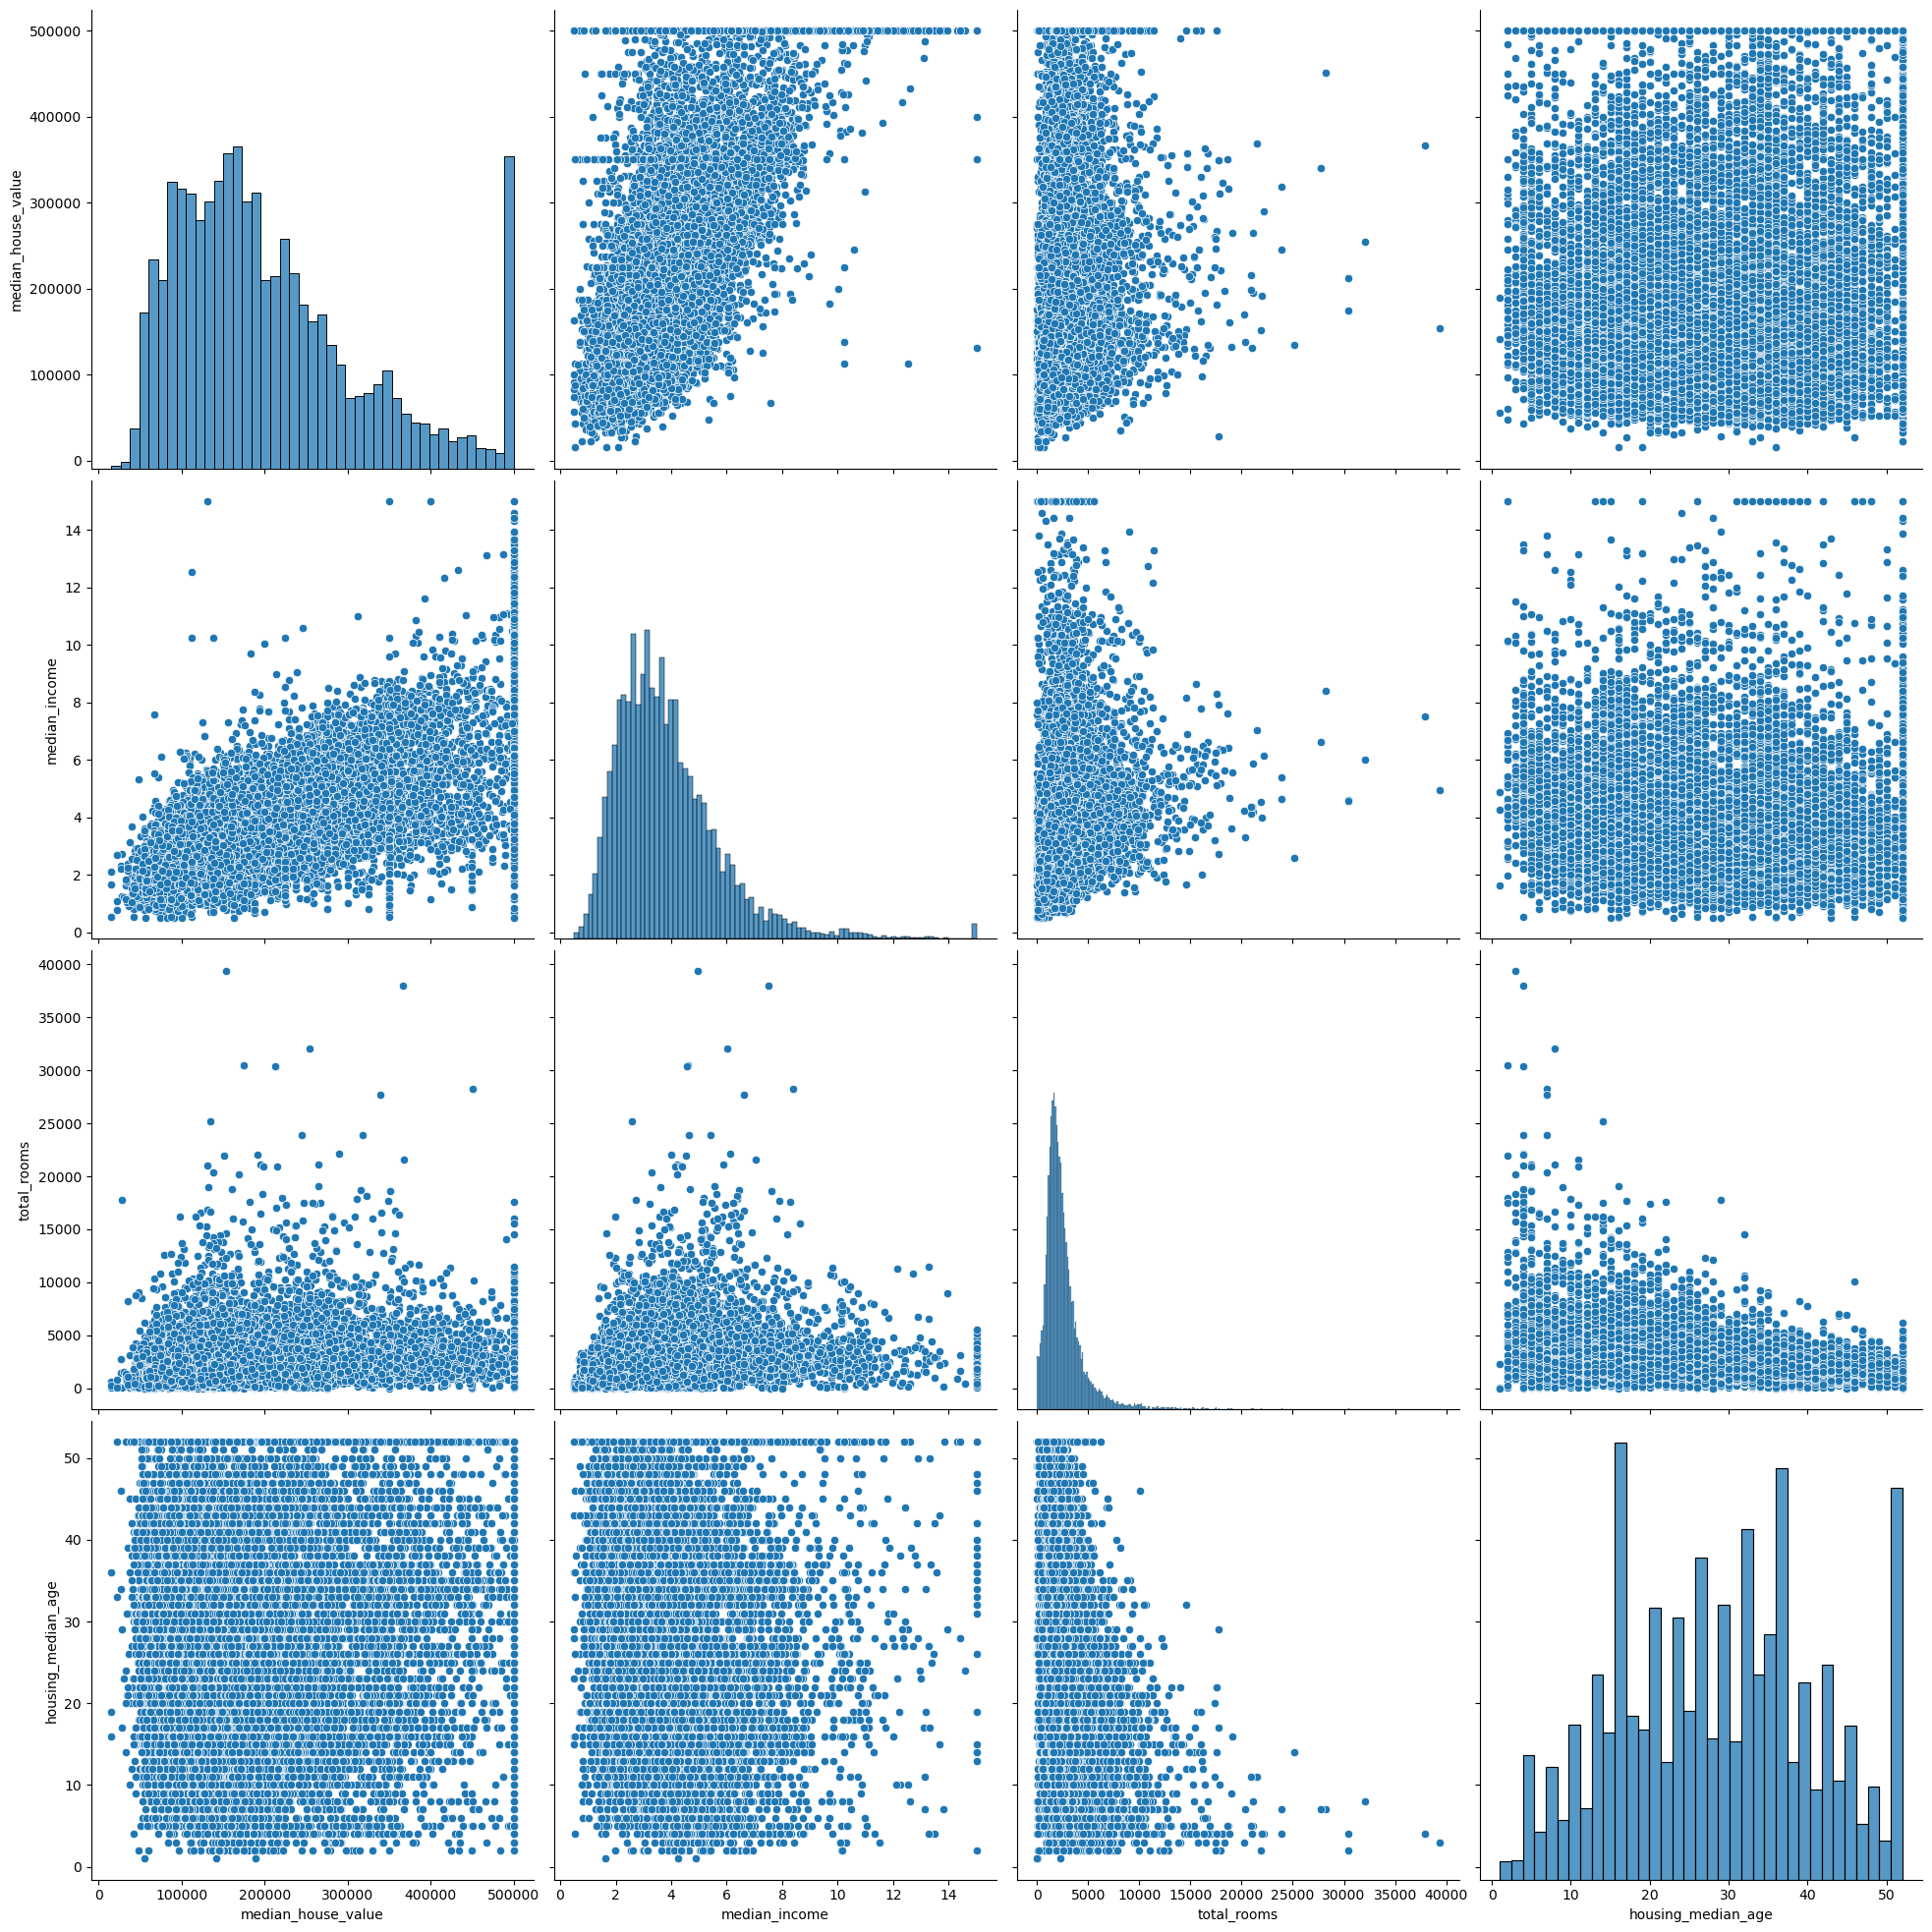

In [26]:
cols=['median_house_value','median_income','total_rooms','housing_median_age']
sns.pairplot(housing[cols],height=5)
plt.show()

In [27]:
housing_num=housing.drop('ocean_proximity',axis=1)

In [28]:
housing_num.corrwith(housing['median_house_value'].sort_values(ascending=False))

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
dtype: float64

In [29]:
# YANGI PARAMETRLAR

In [30]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [32]:
housing_num=housing.drop('ocean_proximity',axis=1)

In [33]:
housing_num.corrwith(housing['median_income']).sort_values(ascending=False)

median_income               1.000000
median_house_value          0.687151
rooms_per_household         0.311528
total_rooms                 0.200133
population_per_household    0.021815
households                  0.010869
population                  0.002421
total_bedrooms             -0.009643
longitude                  -0.019615
latitude                   -0.075146
housing_median_age         -0.111315
bedrooms_per_room          -0.624650
dtype: float64

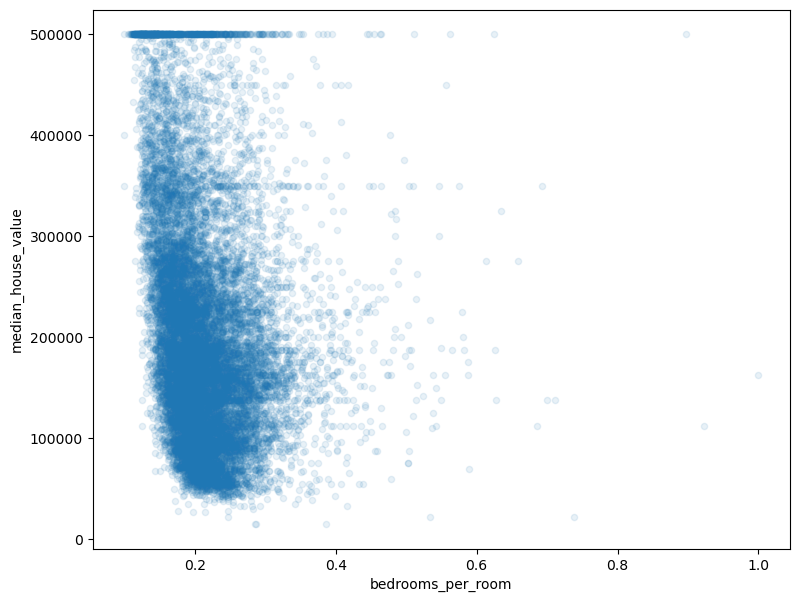

In [34]:
housing.plot(kind='scatter',x='bedrooms_per_room',y='median_house_value',alpha=0.1,figsize=(9,7))
plt.show()

In [35]:
# 3-qadam.ML ga tayyorgarlik.NaN qiymatlar

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


# df.info() yordamida total_bedrooms ustunida ba'zi qatorlarda qiymatlar yo'q (NaN) ekanini aniqlagan edik.

Ushbu qatorlar bizga halaqit bermasligi uchun oldimizda 3 ta yo'l bor:

1.atorlarni (hududlarni) o'chirib tashlash

2.Bu ustunni umuman tashlab yuborish

3.NaN qiymatlarni to'ldirish (0, o'rtacha yoki median qiymat bilan)

In [81]:
# 1
housing.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


In [83]:
# 2
housing.drop('total_bedrooms',axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


In [85]:
median=housing['total_bedrooms'].median()
median

433.0

In [87]:
# 3
housing['total_bedrooms'].fillna(median)

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [89]:
# NaN qiymatlarni almashtirish . SIMPLEIMPUTER
from sklearn.impute import SimpleImputer

In [91]:
imputer=SimpleImputer(strategy='median')

In [93]:
imputer.fit(housing)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'INLAND'

In [95]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [97]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [99]:
X=imputer.transform(housing_num)
X

array([[-121.46      ,   38.52      ,   29.        , ...,    5.48583569,
           0.20578363,    3.16855524],
       [-117.23      ,   33.09      ,    7.        , ...,    6.92708333,
           0.16071429,    2.62369792],
       [-119.04      ,   35.37      ,   44.        , ...,    5.39333333,
           0.19159456,    2.22333333],
       ...,
       [-122.72      ,   38.44      ,   48.        , ...,    4.11046512,
           0.23479491,    2.6627907 ],
       [-122.7       ,   38.31      ,   14.        , ...,    6.29740519,
           0.18383518,    2.41117764],
       [-122.14      ,   39.97      ,   27.        , ...,    5.47715736,
           0.20574606,    3.17258883]])

In [101]:
type(X)

numpy.ndarray

In [103]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,0.182692,3.167241


In [105]:
# SIMPLEENCODER

In [107]:
housing_cat=housing[['ocean_proximity']]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

In [109]:
from sklearn.preprocessing import OrdinalEncoder

In [111]:
ordinal_encoder=OrdinalEncoder()

In [113]:
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [114]:
# ONEHOTENCODER

In [117]:
from sklearn.preprocessing import OneHotEncoder

In [118]:
cat_encoder=OneHotEncoder()

In [121]:
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [122]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

In [126]:
# TRANSFORMER YASASH

In [128]:
from sklearn.base import BaseEstimator,TransformerMixin

In [130]:
room_ix,bedroom_ix,population_ix,household_ix=3,4,5,6

In [132]:
class CombineAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        rooms_per_household=X[:,room_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedroom_ix]/X[:,room_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:return pn.c_[X,rooms_per_household,population_per_household]

In [134]:
housing.values[0,:]

array([-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
       72100.0, 'INLAND', 5.485835694050992, 0.20578363026077975,
       3.168555240793201], dtype=object)

In [137]:
attr_adder=CombineAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs=attr_adder.transform(housing.values)

In [139]:
housing_extra_attribs[0,:]

array([-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
       72100.0, 'INLAND', 5.485835694050992, 0.20578363026077975,
       3.168555240793201, 5.485835694050992, 3.168555240793201,
       0.20578363026077975], dtype=object)

In [142]:
# NORMALIZATSIYA (MINMAXSCALER)

In [144]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [146]:
xmin=housing['median_income'].min()
xmin

0.4999

In [148]:
xmax=housing['median_income'].max()
xmax

15.0001

In [150]:
xnew=(15-xmin)/(xmax-xmin)
xnew

0.9999931035433994

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
min_max_scaler=MinMaxScaler()
housing_num1=min_max_scaler.fit_transform(housing_num)
housing_num1

array([[0.28784861, 0.63549416, 0.54901961, ..., 0.03093793, 0.11753737,
        0.00199273],
       [0.70916335, 0.05844846, 0.11764706, ..., 0.04117562, 0.06746032,
        0.00155426],
       [0.52888446, 0.30074389, 0.84313725, ..., 0.03028086, 0.10177173,
        0.00123207],
       ...,
       [0.1623506 , 0.62699256, 0.92156863, ..., 0.0211682 , 0.14977212,
        0.00158572],
       [0.16434263, 0.61317747, 0.25490196, ..., 0.0367028 , 0.0931502 ,
        0.00138324],
       [0.22011952, 0.78958555, 0.50980392, ..., 0.03087629, 0.11749562,
        0.00199598]])

In [157]:
# STANDARTIZATSIYA (STANDARTSCALER)

In [159]:
from sklearn.preprocessing import StandardScaler

In [161]:
standar_scaler=StandardScaler()

In [163]:
housing_num2=standar_scaler.fit_transform(housing_num)
housing_num2

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
        -0.12355538,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.9090609 , -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.37085412, -0.07537122],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
         0.38207698, -0.03743619],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.50609094, -0.05915604],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
        -0.12421016,  0.00657083]])

In [167]:
# PIPELINE

In [169]:
from sklearn.pipeline import Pipeline

In [177]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombineAttributesAdder(add_bedrooms_per_room=True)),
    ('std_scaler',StandardScaler())
])

In [181]:
num_pipeline.fit_transform(housing_num)

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [184]:
# PIPELINE.MATNLAR

In [186]:
from sklearn.compose import ColumnTransformer

In [190]:
num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])
housing_prepared=full_pipeline.fit_transform(housing)

In [192]:
housing_prepared[0:5,:]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 , -1.16601465,  0.01739526,
        -0.12248362,  0.00622264,  0.01739526,  0.00622264, -0.12112176,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.62745084,  0.56925554,
        -0.91166333, -0.04081077,  0.56925554, -0.04081077, -0.81086696,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -1.07439665, -0.01802432,
        -0.3709391 , -0.07537122, -0.01802432, -0.07537122, -0.33827252,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -